In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10, size=100)

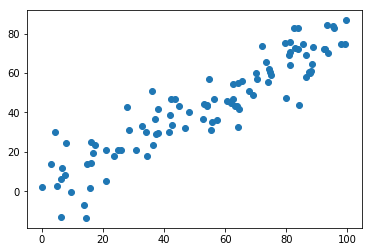

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
X[:10, :]

array([[43.67580101, 46.60947141],
       [99.08862565, 74.52693254],
       [74.5118449 , 60.63027551],
       [86.44485217, 58.24923554],
       [88.6130239 , 73.02762194],
       [82.67495512, 82.6956174 ],
       [72.00953591, 73.93835051],
       [54.77663321, 57.14095948],
       [42.48432064, 33.43631349],
       [92.42827962, 72.10658194]])

In [5]:
np.mean(X[:10, :], axis=0)

array([73.67078721, 63.23613598])

In [6]:
np.sum(X[:10, 1])/ 10

63.23613597698742

In [7]:
def demean(X):
    return X - np.mean(X, axis=0)

In [8]:
X_demean = demean(X)

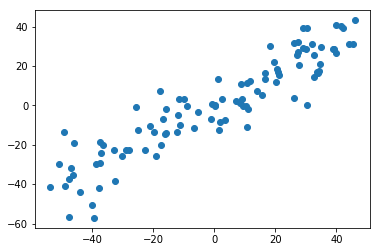

In [9]:
plt.scatter(X_demean[:, 0],  X_demean[:, 1])
plt.show()

### 梯度上升

In [10]:
def f(w, X):
    return np.sum(X.dot(w) ** 2) / len(X)

In [11]:
def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [12]:
# w是方向向量，模为1
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [13]:
# w是方向向量，模为1,在梯度上升过程中有可能模不为1，因此要处理
def direction(w):
    return w / np.linalg.norm(w)
def gradient_ascent(df, X, init_w, eta=0.01, n_iters=1e4, epsilon=1e-8):
    cur = 0
    w = direction(init_w)
    while cur < n_iters:
        cur += 1
        last_w = w
        gradient = df(w, X)
        w = w + eta * gradient
        w = direction(w)
        if abs(f(w, X)) - abs(f(last_w, X)) < epsilon:
            break
    return w

In [14]:
init_w = np.random.random(X.shape[1])
init_w

array([0.95725967, 0.25161574])

In [15]:
w = gradient_ascent(df_debug, X_demean, init_w)

In [16]:
w

array([0.76999984, 0.63804407])

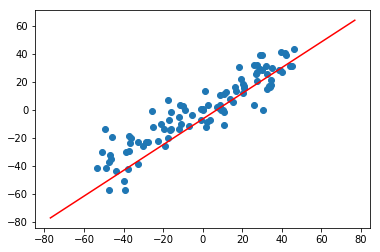

In [17]:
size = 100
plt.scatter(X_demean[:, 0],  X_demean[:, 1])
plt.plot([-w[0] * size, w[0] * size], [-w[0] * size, w[1] * size], color='r')
plt.show()

### 去除第一主成分

In [18]:
X2 = np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w) * w

X3 = X - X.dot(w).reshape(-1, 1) * w

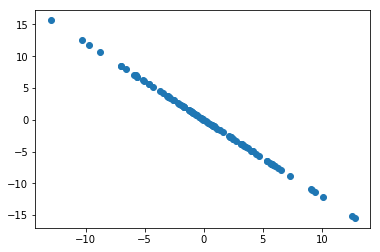

In [19]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

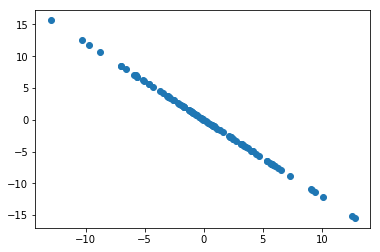

In [20]:
plt.scatter(X3[:, 0], X3[:, 1])
plt.show()

### 求前N个主成分

In [21]:
def first_component(X, init_w, eta=0.01, n_iters=1e4, epsilon=1e-8):
    cur = 0
    w = direction(init_w)
    while cur < n_iters:
        cur += 1
        last_w = w
        gradient = df(w, X)
        w = w + eta * gradient
        w = direction(w)
        if abs(f(w, X)) - abs(f(last_w, X)) < epsilon:
            break
    return w

In [22]:
def first_n_components(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    X_cpy = X.copy()
    X_cpy = demean(X_cpy)
    
    res = []
    for i in range(n):
        init_w = np.random.random(X_cpy.shape[1])
        w = first_component(X_cpy, init_w, eta, epsilon)
        res.append(w)
        
        X_cpy = X_cpy - X_cpy.dot(w).reshape(-1, 1) * w
    return res
        

In [23]:
first_n_components(2, X)

[array([0.79849721, 0.6019985 ]), array([ 0.93165017, -0.36335653])]

### scikit-learn 中的PCA

In [24]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
pca.components_

array([[-0.7699998 , -0.63804413]])

In [28]:
X_reduction = pca.transform(X)

In [29]:
X_reduction.shape

(100, 1)

In [30]:
X_restore = pca.inverse_transform(X_reduction)

In [31]:
X_restore.shape

(100, 2)